In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/housing-price-prediction/Housing.csv


In [2]:
df=pd.read_csv('/kaggle/input/housing-price-prediction/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
for col in df.columns:
    print(col,':',df[col].dtype)

price : int64
area : int64
bedrooms : int64
bathrooms : int64
stories : int64
mainroad : object
guestroom : object
basement : object
hotwaterheating : object
airconditioning : object
parking : int64
prefarea : object
furnishingstatus : object


In [5]:
def data_info(df):
    print("Size\n",df.shape)
    print("sample:\n",df.head(4))
    print("describe:\n",df.describe())
    print("null:\n",df.isna().sum())
    print("columns:\n",df.columns)
    print("duplicate:\n",df.drop_duplicates(inplace=True))
data_info(df)

Size
 (545, 13)
sample:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
describe:
               price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.8055

ordinal encoding

In [6]:
ordinal_col=df.select_dtypes(include='object').columns.tolist()
print(ordinal_col)

for col in ordinal_col:
    df[col]=df[col].replace({'yes':1,'no':0,})
df['furnishingstatus']=df['furnishingstatus']
from sklearn.preprocessing import OrdinalEncoder

encoder=OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']])
df['furnishingstatus']=encoder.fit_transform(df[['furnishingstatus']])

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


/tmp/ipykernel_13/1334393041.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].replace({'yes':1,'no':0,})


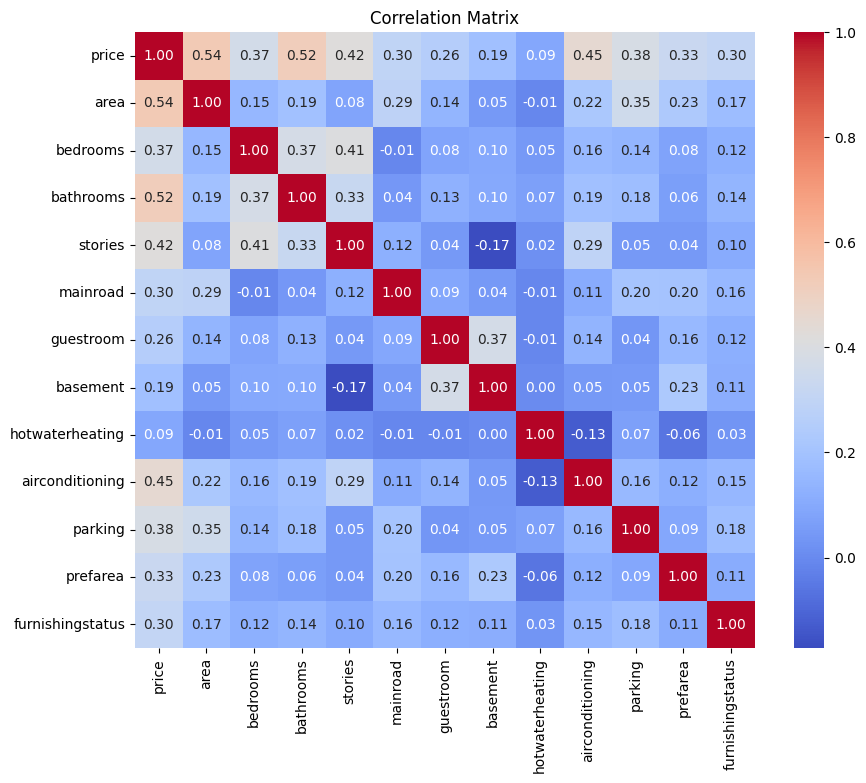

In [7]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Simple Linear Regression 

In [8]:
simple_linear=LinearRegression()

In [9]:
X=df[['area']]
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
simple_linear.fit(X_train,y_train)

LinearRegression()

In [10]:
# Predict the house prices on test data
y_pred_simple = simple_linear.predict(X_test)

# Calculate the performance metrics
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(f'Mean Squared Error: {mse_simple}')
print(f'R-squared: {r2_simple}')


Mean Squared Error: 3675286604768.1855
R-squared: 0.27287851871974633


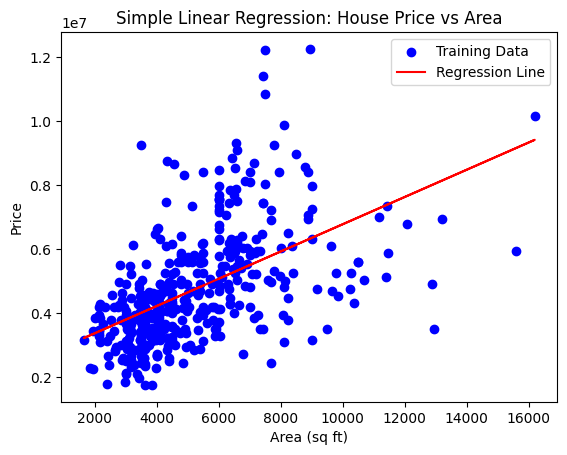

In [11]:
# Plotting the training data and the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train,simple_linear.predict(X_train), color='red', label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Simple Linear Regression: House Price vs Area')
plt.legend()
plt.show()


In [12]:
multiple_linear=LinearRegression()

In [13]:
X=df.drop(columns='price')
y=df['price']

In [14]:
X_train_multi,X_test_multi,y_train_multi,y_test_multi=train_test_split(X,y,test_size=0.2,random_state=40)
multiple_linear.fit(X_train_multi,y_train_multi)

LinearRegression()

In [15]:
# Predict house prices on test data
y_pred_multi = multiple_linear.predict(X_test_multi)

# Calculate the performance metrics for multiple regression
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print(f'Mean Squared Error (Multiple Linear Regression): {mse_multi}')
print(f'R-squared (Multiple Linear Regression): {r2_multi}')


Mean Squared Error (Multiple Linear Regression): 1466037860959.4463
R-squared (Multiple Linear Regression): 0.6591408850872555
